# Testing metglyph

## Setup stuff
Let's install some deps that will eventually be installed as part of `metglyph` and also disable warnings because `matplotlib` has lots of them and they are annoying.

In [1]:
!pip install cairosvg imageio datapoint
!conda install basemap -y

..........
Solving package specifications: .

Package plan for installation in environment /opt/conda:

The following NEW packages will be INSTALLED:

    basemap: 1.1.0-py36_4 conda-forge

basemap-1.1.0- 100% |################################| Time: 0:00:02   5.65 MB/s


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Getting started with metglyph
First we will import the library, a glyphset and create a new `GlyphSet` object and show the html represenatation.


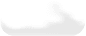
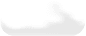
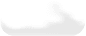
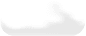
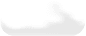
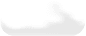
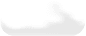
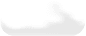
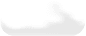
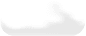
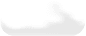
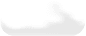
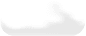
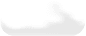
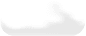
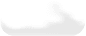
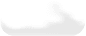
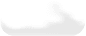
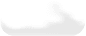
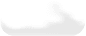
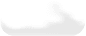
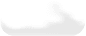
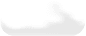

In [3]:
from metglyphs import GlyphSet
from metglyphs.glyphs import YRNO_GLYPHS
glyphs = GlyphSet(name=YRNO_GLYPHS)
glyphs

We can also grab a single glyph for a weather code returned from datapoint.


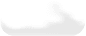

In [4]:
glyph = glyphs.get_glyph(datapoint_code="10")
glyph

By default glyphs are will render an svg. However you can cast it to other image types, for example we can convert it to a PNG, scale it a little larger and then get our notebook to display it.

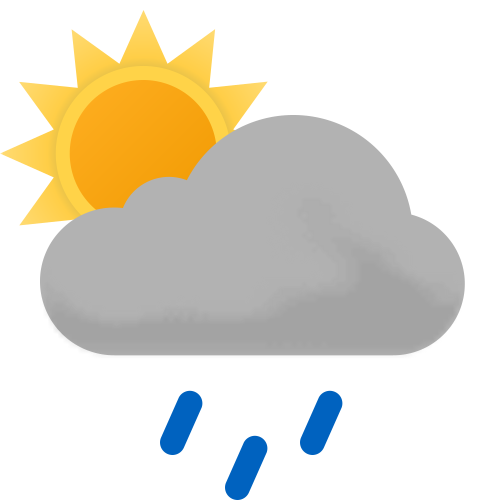

In [5]:
from IPython.display import Image
Image(glyph.to_png(scale=5), retina=True)

## Putting glyphs on maps
The whole point of this library is to make it easy to create weather maps. So let's make some.

The first step is getting some data. Below is an array of places along with the [weather codes](https://www.metoffice.gov.uk/datapoint/support/documentation/code-definitions) returned from the [Met Office Datapoint](https://www.metoffice.gov.uk/datapoint).

In [6]:
data = [
    ('Exeter', 50.7184, -3.5339, '3'),
    ('Truro', 50.2632, -5.051, '7'),
    ('Carmarthen', 51.8576, -4.3121, '10'),
    ('Norwich', 52.6309, 1.2974, '1'),
    ('Brighton And Hove', 50.8225, -0.1372, '1'),
    ('Bristol', 51.44999778, -2.583315472, '1'),
    ('Durham', 54.7753, -1.5849, '7'),
    ('Llanidloes', 52.4135, -3.5883, '3'),
    ('Penrith', 54.6641, -2.7527, '3'),
    ('Jedburgh', 55.4777, -2.5549, '3'),
    ('Coventry', 52.42040367, -1.499996583, '7'),
    ('Edinburgh', 55.94832786, -3.219090618, '3'),
    ('Cambridge', 52.2053, 0.1218, '3'),
    ('Glasgow', 55.87440472, -4.250707236, '3'),
    ('Kingston upon Hull', 53.7457, -0.3367, '8'),
    ('Leeds', 53.83000755, -1.580017539, '7'),
    ('London', 51.49999473, -0.116721844, '3'),
    ('Manchester', 53.50041526, -2.247987103, '7'),
    ('Nottingham', 52.97034426, -1.170016725, '7'),
    ('Aberdeen', 57.1497, -2.0943, '1'),
    ('Fort Augustus', 57.1448, -4.6805, '10'),
    ('Lairg', 58.197, -4.6173, '14'),
    ('Oxford', 51.7517, -1.2553, '7'),
    ('Inverey', 56.9855, -3.5055, '3'),
    ('Shrewsbury', 52.7069, -2.7527, '7'),
    ('Colwyn Bay', 53.2932, -3.7276, '1'),
    ('Newton Stewart', 54.9186, -4.5918, '7'),
    ('Portsmouth', 50.80034751, -1.080022218, '1'),
    ('Lerwick', 60.153, -0.7467, '7'),
    ('Belfast', 54.5987398, -5.9280548, '1'),
    ('Derry', 54.9964163, -7.3093474, '3'),
    ('Stornoway', 58.216788, -6.3902244, '12')]

We will also define a function which plots a set of data onto a map using matplotlib.

In [7]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_data(data, glyphs, land_color, sea_color, glyph_scale):
    # Create a figure
    fig, axes = plt.subplots(figsize=(10,10))

    # Draw a map over the UK
    forecast_map = Basemap(projection='mill',llcrnrlon=-8.5,llcrnrlat=49.84,urcrnrlon=2.5,urcrnrlat=61,resolution='l')

    # Fill continents and ocean with colors
    forecast_map.fillcontinents(color=land_color, lake_color=sea_color)
    forecast_map.drawmapboundary(fill_color=sea_color)

    # Add icons using metglyphs
    for (city, lat, lon, weather) in data:
        # Get the glyph for the current weather
        glyph = glyphs.get_glyph(datapoint_code=weather)
        # Draw the glyph into the map
        axes.add_artist(AnnotationBbox(OffsetImage(glyph.to_np_array(scale=glyph_scale), zoom=0.5), forecast_map(lon, lat), frameon=False))

    plt.show()

Now we will plot the data using the symbol set we created before.

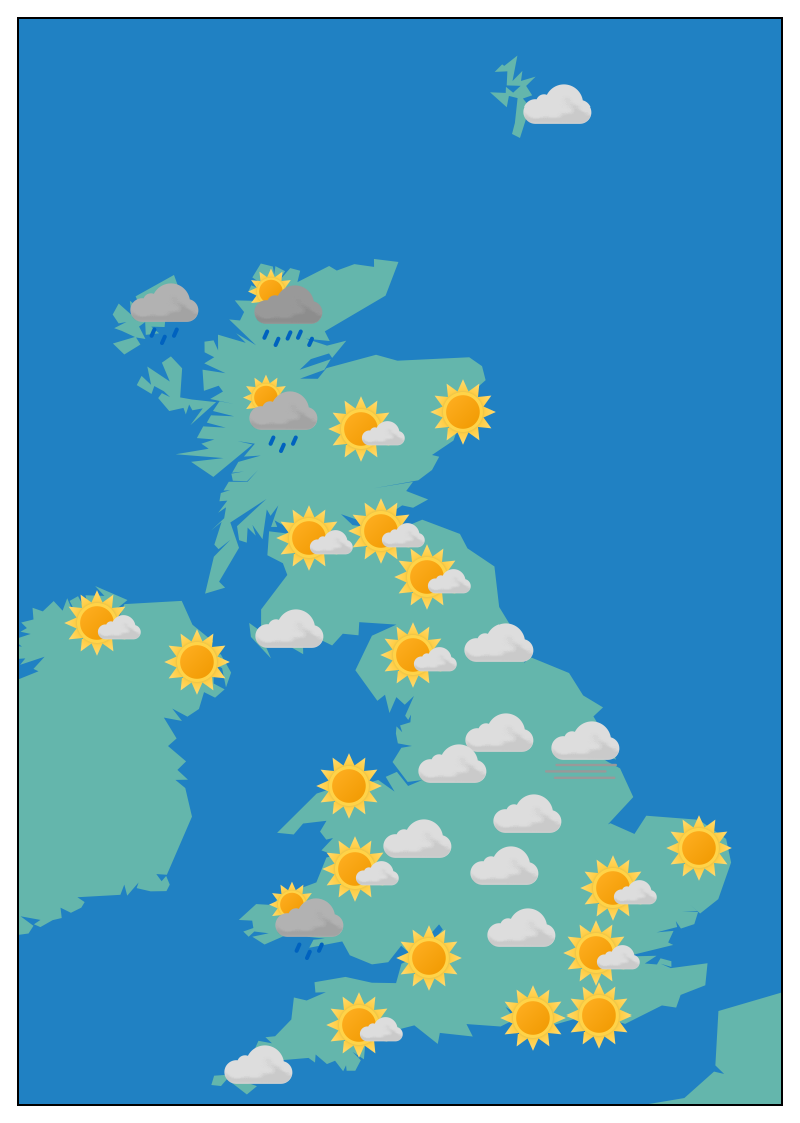

In [8]:
plot_data(data, glyphs, land_color='#64B6AC', sea_color='#2081C3', glyph_scale=0.8)

We can also just pass a new `GlyphSet`, we'll leave out the args this time which means we will use the default Met Office symbol set.

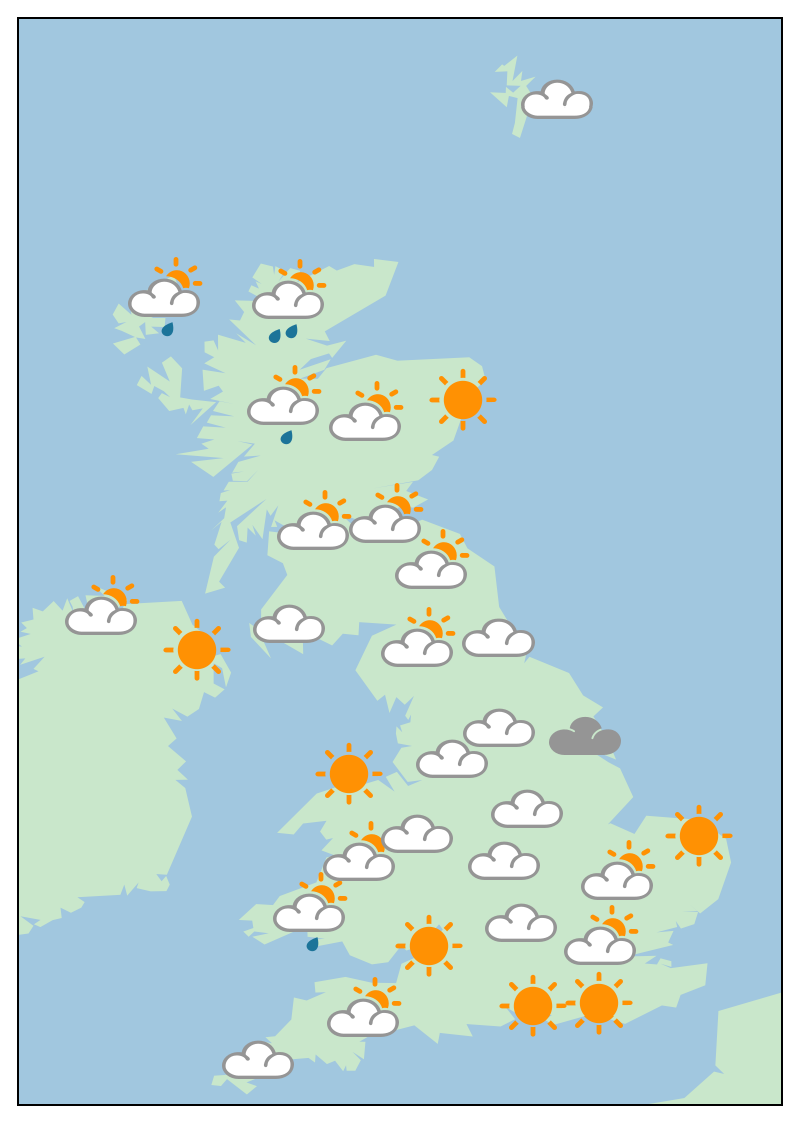

In [9]:
plot_data(data, GlyphSet(), land_color='#C9E7CB', sea_color='#A1C7DF', glyph_scale=2.4)

As these sets are effectively SVG images underneath we can change the colours of the images programatically. Let's import a simple monochrome set of glyphs.

In [10]:
from metglyphs.glyphs import WEATHER_ICONS_IO_GLYPHS

new_glyphs = GlyphSet(name=WEATHER_ICONS_IO_GLYPHS)
new_glyphs

As you can see these images are purple, but we can specify a `recolor` dictionary which will update the colours of the SVGs. The format of the dictionary is `{"hex colour to replace", "hex colour to replace with"}`. You can directly update the `recolor` property of a `GlyphSet` or pass it as a kwarg to the `GlyphSet` contructor. You can also pass it to the `GlyphSet.get_glyph` method for recolouring individual glyphs.

Let's make these glyphs white and put them on a nice dark background.

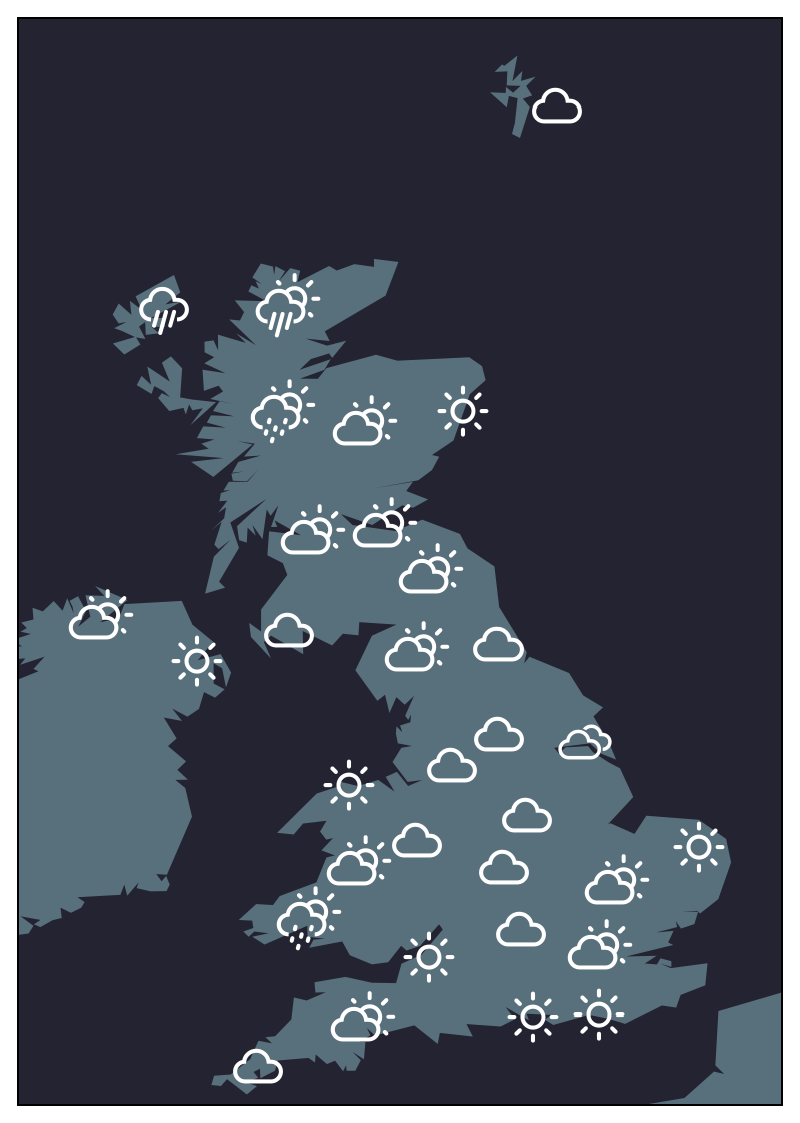

In [11]:
new_glyphs.recolor = {"#9150a1": "#FFFFFF"}

plot_data(data, new_glyphs, land_color='#586F7C', sea_color='#242331', glyph_scale=2.4)

Now let's create a list of colour schemes and plot them side-by-side, similar to the plot above.

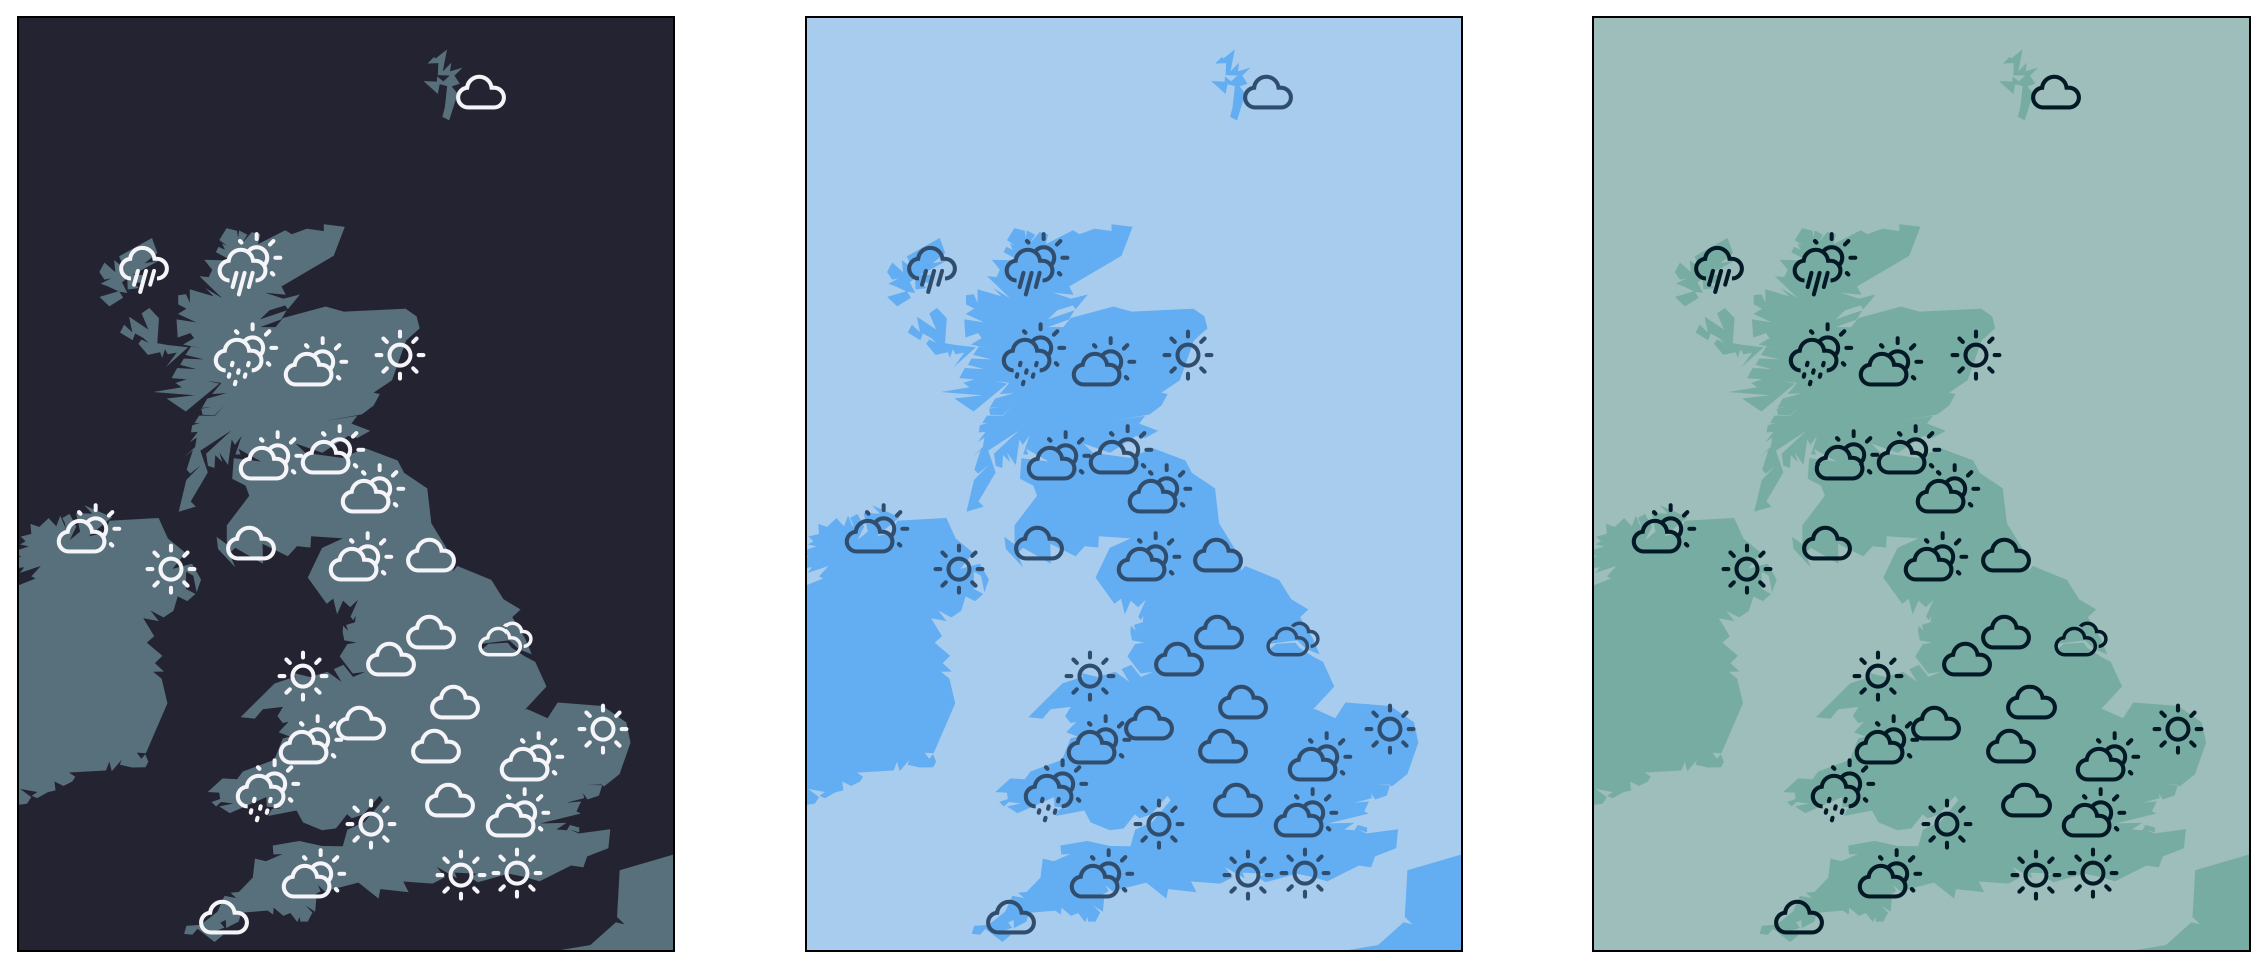

In [12]:
# List our schemes
colours_schemes = [
    # Glyph      Land       Sea
    ("#F4F4F9", '#586F7C', '#242331'),
    ("#304D6D", '#63ADF2', '#A7CCED'),
    ("#031926", '#77ACA2', '#9DBEBB')
]

# Create a figure
fig, axes = plt.subplots(nrows=1, ncols=len(colours_schemes), figsize=(20,20))

# Create an array for maps 
forecast_maps = []

# Loop over the colour schemes
for i, (glyph_colour, map_colour, sea_colour) in enumerate(colours_schemes):
    # Get a new set of glyphs in a certain colour
    glyphs = GlyphSet(name=WEATHER_ICONS_IO_GLYPHS, recolor={"#9150a1": glyph_colour})
    
    # Draw a map over the UK
    forecast_maps.insert(i, Basemap(projection='mill',llcrnrlon=-8.5,llcrnrlat=49.84,urcrnrlon=2.5,urcrnrlat=61,resolution='l',ax=axes[i]))

    # Fill continents and ocean with colors
    forecast_maps[i].fillcontinents(color=map_colour, lake_color=sea_colour)
    forecast_maps[i].drawmapboundary(fill_color=sea_colour)

    # Add icons using metglyphs
    for (city, lat, lon, weather) in data:
        # Get the glyph for the current weather
        glyph = glyphs.get_glyph(datapoint_code=weather)
        # Draw the glyph into the map
        axes[i].add_artist(AnnotationBbox(OffsetImage(glyph.to_np_array(scale=2.4), zoom=0.5), forecast_maps[i](lon, lat), frameon=False))

plt.show()

## Getting data and plotting it

It's great to experiment with out canned set of data above, but let's actually grab some live data from an API and plot it. The `metglyph` library supports data multiple APIs that use different weather codes. Let's get the weather for each US state from Dark Sky and plot it.

In [13]:
# List of US states and their average lat/lon
states = [
    {'latitude': 61.385, 'longitude': -152.2683, 'state': 'Alaska'},
    {'latitude': 32.799, 'longitude': -86.8073, 'state': 'Alabama'},
    {'latitude': 34.9513, 'longitude': -92.3809, 'state': 'Arkansas'},
    {'latitude': 33.7712, 'longitude': -111.3877, 'state': 'Arizona'},
    {'latitude': 36.17, 'longitude': -119.7462, 'state': 'California'},
    {'latitude': 39.0646, 'longitude': -105.3272, 'state': 'Colorado'},
    {'latitude': 41.5834, 'longitude': -72.7622, 'state': 'Connecticut'},
    {'latitude': 39.3498, 'longitude': -75.5148, 'state': 'Delaware'},
    {'latitude': 27.8333, 'longitude': -81.717, 'state': 'Florida'},
    {'latitude': 32.9866, 'longitude': -83.6487, 'state': 'Georgia'},
    {'latitude': 21.1098, 'longitude': -157.5311, 'state': 'Hawaii'},
    {'latitude': 42.0046, 'longitude': -93.214, 'state': 'Iowa'},
    {'latitude': 44.2394, 'longitude': -114.5103, 'state': 'Idaho'},
    {'latitude': 40.3363, 'longitude': -89.0022, 'state': 'Illinois'},
    {'latitude': 39.8647, 'longitude': -86.2604, 'state': 'Indiana'},
    {'latitude': 38.5111, 'longitude': -96.8005, 'state': 'Kansas'},
    {'latitude': 37.669, 'longitude': -84.6514, 'state': 'Kentucky'},
    {'latitude': 31.1801, 'longitude': -91.8749, 'state': 'Louisiana'},
    {'latitude': 42.2373, 'longitude': -71.5314, 'state': 'Massachusetts'},
    {'latitude': 39.0724, 'longitude': -76.7902, 'state': 'Maryland'},
    {'latitude': 44.6074, 'longitude': -69.3977, 'state': 'Maine'},
    {'latitude': 43.3504, 'longitude': -84.5603, 'state': 'Michigan'},
    {'latitude': 45.7326, 'longitude': -93.9196, 'state': 'Minnesota'},
    {'latitude': 38.4623, 'longitude': -92.302, 'state': 'Missouri'},
    {'latitude': 32.7673, 'longitude': -89.6812, 'state': 'Mississippi'},
    {'latitude': 46.9048, 'longitude': -110.3261, 'state': 'Montana'},
    {'latitude': 35.6411, 'longitude': -79.8431, 'state': 'North Carolina'},
    {'latitude': 47.5362, 'longitude': -99.793, 'state': 'North Dakota'},
    {'latitude': 41.1289, 'longitude': -98.2883, 'state': 'Nebraska'},
    {'latitude': 43.4108, 'longitude': -71.5653, 'state': 'New Hampshire'},
    {'latitude': 40.314, 'longitude': -74.5089, 'state': 'New Jersey'},
    {'latitude': 34.8375, 'longitude': -106.2371, 'state': 'New Mexico'},
    {'latitude': 38.4199, 'longitude': -117.1219, 'state': 'Nevada'},
    {'latitude': 42.1497, 'longitude': -74.9384, 'state': 'New York'},
    {'latitude': 40.3736, 'longitude': -82.7755, 'state': 'Ohio'},
    {'latitude': 35.5376, 'longitude': -96.9247, 'state': 'Oklahoma'},
    {'latitude': 44.5672, 'longitude': -122.1269, 'state': 'Oregon'},
    {'latitude': 40.5773, 'longitude': -77.264, 'state': 'Pennsylvania'},
    {'latitude': 41.6772, 'longitude': -71.5101, 'state': 'Rhode Island'},
    {'latitude': 33.8191, 'longitude': -80.9066, 'state': 'South Carolina'},
    {'latitude': 44.2853, 'longitude': -99.4632, 'state': 'South Dakota'},
    {'latitude': 35.7449, 'longitude': -86.7489, 'state': 'Tennessee'},
    {'latitude': 31.106, 'longitude': -97.6475, 'state': 'Texas'},
    {'latitude': 40.1135, 'longitude': -111.8535, 'state': 'Utah'},
    {'latitude': 37.768, 'longitude': -78.2057, 'state': 'Virginia'},
    {'latitude': 44.0407, 'longitude': -72.7093, 'state': 'Vermont'},
    {'latitude': 47.3917, 'longitude': -121.5708, 'state': 'Washington'},
    {'latitude': 44.2563, 'longitude': -89.6385, 'state': 'Wisconsin'},
    {'latitude': 38.468, 'longitude': -80.9696, 'state': 'West Virginia'},
    {'latitude': 42.7475, 'longitude': -107.2085, 'state': 'Wyoming'}]

Now for each state let's make a request to Dark Sky. We'll need an API key for this. The code snippet below will look it up from the environment variable `DARKSKY_API_KEY`. Either set that in your environment and restart your notebook or make a new cell and run the code `os.environ["DARKSKY_API_KEY"] = 'your key'`.

In [16]:
import os
import requests

states_with_data = []

for state in states:
    forecast = requests.get("https://api.darksky.net/forecast/{api}/{lat},{lon}".format(api=os.environ["DARKSKY_API_KEY"], lat=state["latitude"], lon=state["longitude"]))
    icon = forecast.json()["hourly"]["data"][2]["icon"]
    states_with_data.append((state["state"], state["latitude"], state["longitude"], icon))

We'll also create a new plotting function centred over the US and we'll specify the `darksky_code` kwarg in `get_glyph` this time.

In [17]:
%config InlineBackend.figure_format = 'retina'  # Optional for retina displays

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_usa_data(data, glyphs, land_color, sea_color, glyph_scale):
    # Create a figure
    fig, axes = plt.subplots(figsize=(20,20))

    # Draw a map over the USA
    forecast_map = Basemap(projection='mill',llcrnrlon=-124.7844079,llcrnrlat=24.7433195,urcrnrlon=-66.9513812,urcrnrlat=49.3457868,resolution='l')

    # Fill continents and ocean with colors
    forecast_map.fillcontinents(color=land_color, lake_color=sea_color)
    forecast_map.drawmapboundary(fill_color=sea_color)

    # Add icons using metglyphs
    for (city, lat, lon, weather) in data:
        # Get the glyph for the current weather
        glyph = glyphs.get_glyph(darksky_code=weather)
        # Draw the glyph into the map
        axes.add_artist(AnnotationBbox(OffsetImage(glyph.to_np_array(scale=glyph_scale), zoom=0.5), forecast_map(lon, lat), frameon=False))

    plt.title("US weather by state")
    plt.show()

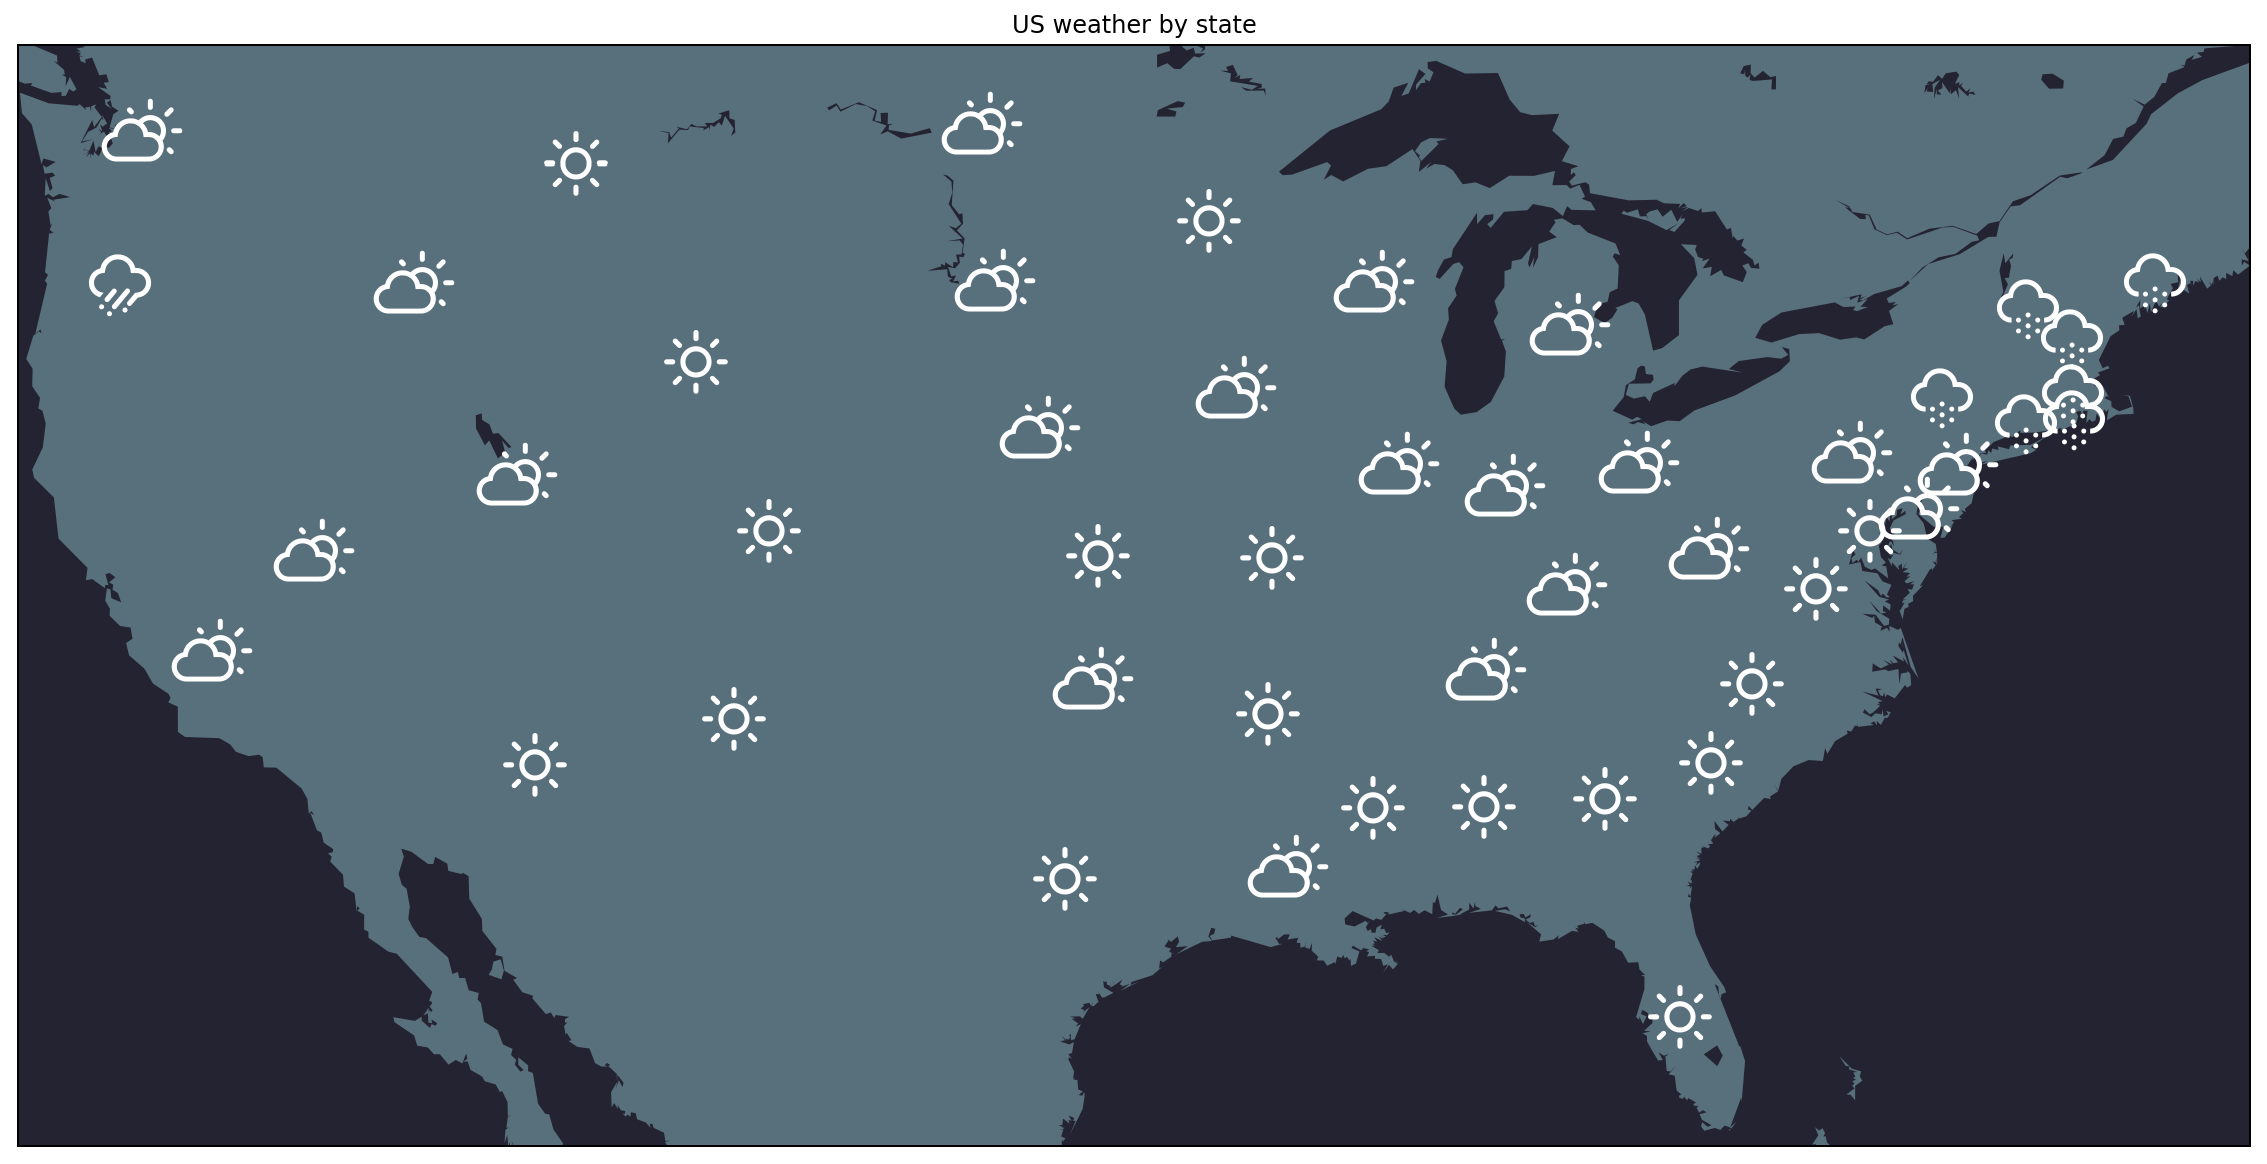

In [18]:
plot_usa_data(states_with_data, new_glyphs, land_color='#586F7C', sea_color='#242331', glyph_scale=3)

In [19]:
import datapoint
conn = datapoint.connection(api_key=os.environ["DATAPOINT_API_KEY"])

In [20]:
new_data = []
for (city, lat, lon, weather) in data:
    site = conn.get_nearest_site(latitude=lat, longitude=lon)
    forecast = conn.get_forecast_for_site(site.id, "3hourly")
    new_data.append((city, lat, lon, forecast.now().weather.value))

In [21]:
new_data

[('Exeter', 50.7184, -3.5339, '7'),
 ('Truro', 50.2632, -5.051, '7'),
 ('Carmarthen', 51.8576, -4.3121, '1'),
 ('Norwich', 52.6309, 1.2974, '8'),
 ('Brighton And Hove', 50.8225, -0.1372, '7'),
 ('Bristol', 51.44999778, -2.583315472, '3'),
 ('Durham', 54.7753, -1.5849, '15'),
 ('Llanidloes', 52.4135, -3.5883, '1'),
 ('Penrith', 54.6641, -2.7527, '7'),
 ('Jedburgh', 55.4777, -2.5549, '7'),
 ('Coventry', 52.42040367, -1.499996583, '8'),
 ('Edinburgh', 55.94832786, -3.219090618, '7'),
 ('Cambridge', 52.2053, 0.1218, '7'),
 ('Glasgow', 55.87440472, -4.250707236, '8'),
 ('Kingston upon Hull', 53.7457, -0.3367, '7'),
 ('Leeds', 53.83000755, -1.580017539, '3'),
 ('London', 51.49999473, -0.116721844, '7'),
 ('Manchester', 53.50041526, -2.247987103, '7'),
 ('Nottingham', 52.97034426, -1.170016725, '7'),
 ('Aberdeen', 57.1497, -2.0943, '7'),
 ('Fort Augustus', 57.1448, -4.6805, '7'),
 ('Lairg', 58.197, -4.6173, '8'),
 ('Oxford', 51.7517, -1.2553, '7'),
 ('Inverey', 56.9855, -3.5055, '7'),
 ('Shre

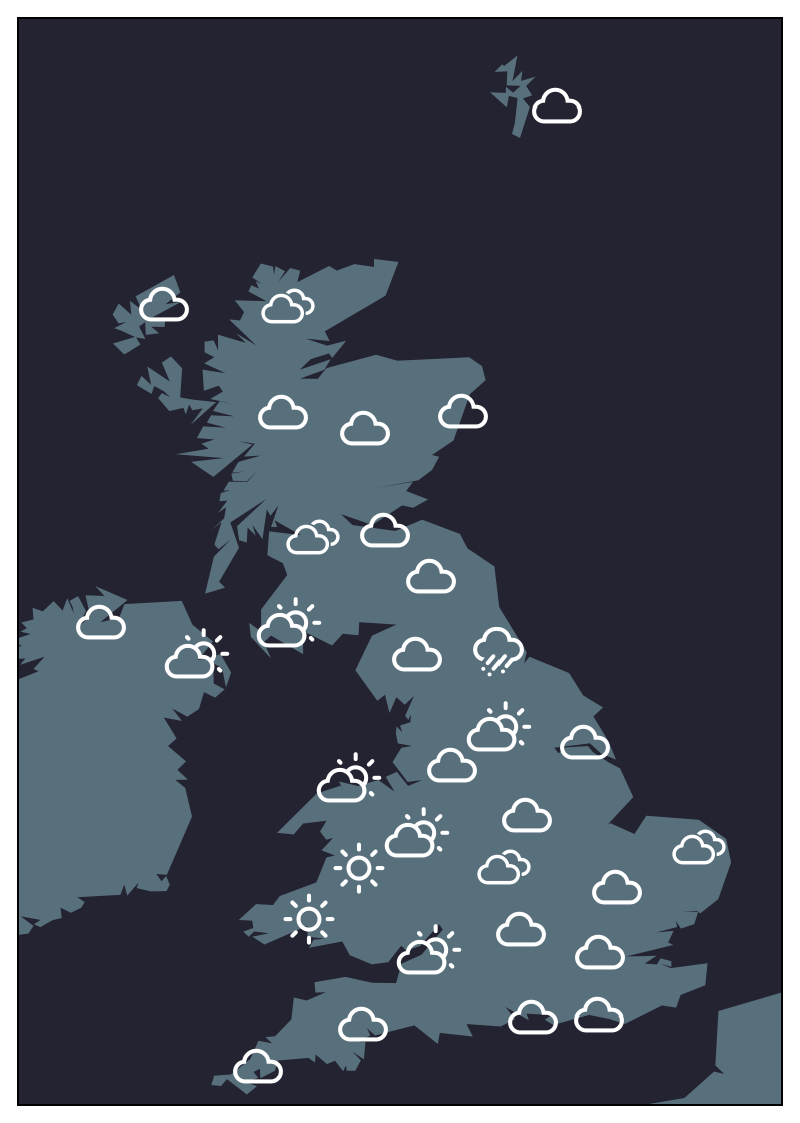

In [22]:
plot_data(new_data, GlyphSet(WEATHER_ICONS_IO_GLYPHS, recolor={"#9150a1": "#FFFFFF"}), land_color='#586F7C', sea_color='#242331', glyph_scale=2.4)

In [23]:
states_with_data

[('Alaska', 61.385, -152.2683, 'clear-night'),
 ('Alabama', 32.799, -86.8073, 'clear-day'),
 ('Arkansas', 34.9513, -92.3809, 'clear-day'),
 ('Arizona', 33.7712, -111.3877, 'clear-day'),
 ('California', 36.17, -119.7462, 'partly-cloudy-day'),
 ('Colorado', 39.0646, -105.3272, 'clear-day'),
 ('Connecticut', 41.5834, -72.7622, 'snow'),
 ('Delaware', 39.3498, -75.5148, 'partly-cloudy-day'),
 ('Florida', 27.8333, -81.717, 'clear-day'),
 ('Georgia', 32.9866, -83.6487, 'clear-day'),
 ('Hawaii', 21.1098, -157.5311, 'wind'),
 ('Iowa', 42.0046, -93.214, 'partly-cloudy-day'),
 ('Idaho', 44.2394, -114.5103, 'partly-cloudy-day'),
 ('Illinois', 40.3363, -89.0022, 'partly-cloudy-day'),
 ('Indiana', 39.8647, -86.2604, 'partly-cloudy-day'),
 ('Kansas', 38.5111, -96.8005, 'clear-day'),
 ('Kentucky', 37.669, -84.6514, 'partly-cloudy-day'),
 ('Louisiana', 31.1801, -91.8749, 'partly-cloudy-day'),
 ('Massachusetts', 42.2373, -71.5314, 'snow'),
 ('Maryland', 39.0724, -76.7902, 'clear-day'),
 ('Maine', 44.607

In [24]:
import cartopy
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

from metglyphs import GlyphSet
from metglyphs.glyphs import YRNO_GLYPHS

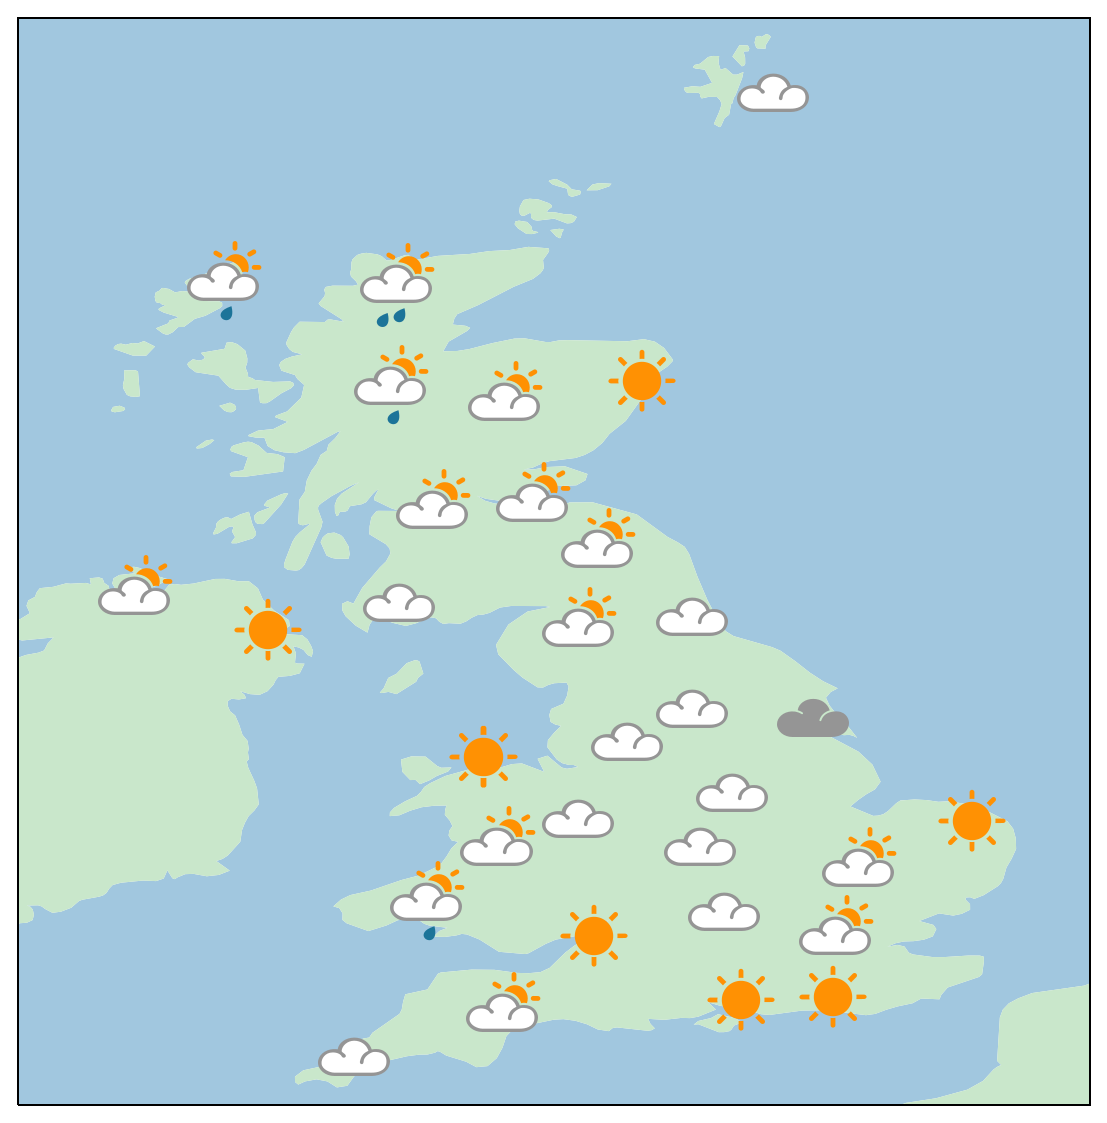

In [25]:
%config InlineBackend.figure_format = 'retina'  # Optional for retina displays

projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=projection)
ax.set_extent([-8.5, 2.5, 49.84, 61], projection)

ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor=None, facecolor='#A1C7DF', zorder=0))
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', edgecolor=None, facecolor='#C9E7CB', zorder=0))

glyphs = GlyphSet()

for (city, lat, lon, weather) in data:
    # Get the glyph for the current weather
    glyph = glyphs.get_glyph(datapoint_code=weather)
    ax.add_artist(
        AnnotationBbox(
            OffsetImage(glyph.to_np_array(scale=2.4), zoom=0.5), 
            (lon, lat), 
            frameon=False))

plt.show()